In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, Query
from sqlalchemy import create_engine, func, inspect

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")



['measurement', 'station']

In [ ]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [23]:
columns1 = inspector.get_columns('measurement')
for column in columns1:
    print(column["name"], column["type"])
    
columns2 = inspector.get_columns('station')
for column in columns2:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
precipitation_db = (
                    Query(Measurement)
                    .filter(func.strftime("%m", Dow.date) == '05')
                    .with_entities(*sel)
                    .group_by(Dow.stock)
                    .with_session(session)
                    .all()
)

In [ ]:
date = dt.datetime(2011, 5, 31)

results = session.query(Dow.high_price - Dow.low_price).\
    filter(Dow.date > date).filter(Dow.stock == 'IBM').all()

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
q1 = (
    Query(Measurement)
    .with_session(session)
    .all()
)
print(len(q1))


# for i in range(19545, 19550):
#     print(q1[i].date)

    # date one year previous is 2016-08-23
# Perform a query to retrieve the data and precipitation scores
year_ago = dt.datetime(2016, 8, 23)
sel = [Measurement.date, Measurement.id, Measurement.station, Measurement.prcp, Measurement.tobs]
q2 = (
    Query(sel)
    .filter(Measurement.date > year_ago)
    .with_session(session)
    .all()
)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(q2, columns = ['date', 'id', 'station', 'prcp', 'tobs'])
#df.set_index('date', inplace=True)
df.head()

# Sort the dataframe by date - already sorted?



19550


,date,id,station,prcp,tobs
0,2016-08-24,2365,USC00519397,0.08,79.0
1,2016-08-25,2366,USC00519397,0.08,80.0
2,2016-08-26,2367,USC00519397,0.00,79.0
3,2016-08-27,2368,USC00519397,0.00,77.0
4,2016-08-28,2369,USC00519397,0.01,78.0


In [60]:
df_g = df.groupby(df['date'])
df['date'].value_counts()

df_sorted = df.sort_values(by = 'date')
df_sorted.head()
df_sorted.reset_index()

,index,date,id,station,prcp,tobs
0,0,2016-08-24,2365,USC00519397,0.08,79.0
1,1006,2016-08-24,8826,USC00517948,NaN,78.0
2,1524,2016-08-24,14609,USC00519281,2.15,77.0
3,702,2016-08-24,7332,USC00514830,2.28,80.0
4,360,2016-08-24,5092,USC00513117,2.15,76.0
...,...,...,...,...,...,...
2218,1522,2017-08-22,12186,USC00519523,0.00,82.0
2219,1523,2017-08-23,12187,USC00519523,0.08,82.0
2220,359,2017-08-23,2724,USC00519397,0.00,81.0
2221,1005,2017-08-23,7635,USC00514830,0.00,82.0


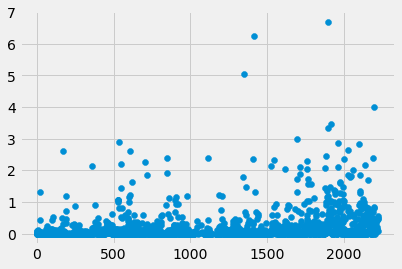

In [63]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.scatter(df_sorted.index, df_sorted['prcp']);

In [64]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_sorted['prcp'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [66]:
# Design a query to show how many stations are available in this dataset?
df['station'].nunique()

USC00519397    360
USC00519281    351
USC00516128    348
USC00513117    342
USC00519523    336
USC00514830    304
USC00517948    182
Name: station, dtype: int64

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
df['station'].value_counts()

In [70]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
df[df['station'] == 'USC00519397']['prcp'].describe()

count    358.000000
mean       0.044944
std        0.189059
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        2.620000
Name: prcp, dtype: float64

In [74]:
df['tobs'].describe()

count    2223.000000
mean       74.578947
std         4.612232
min        58.000000
25%        71.000000
50%        75.000000
75%        78.000000
max        87.000000
Name: tobs, dtype: float64

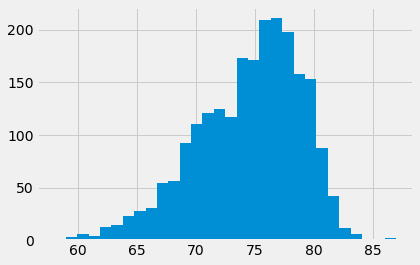

In [78]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
fig1, ax1 = plt.subplots()
ax1.hist(df['tobs'], 30);

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
